In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
data = pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


(array([ 96.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0., 219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

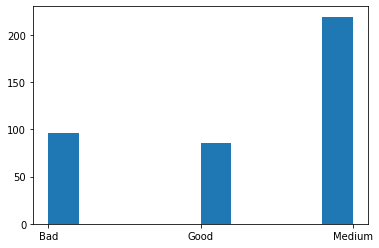

In [5]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(data['ShelveLoc']) 

(array([282.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

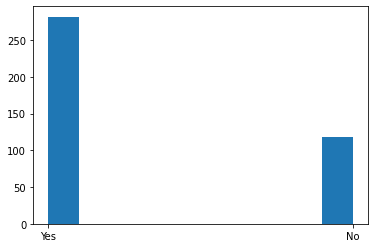

In [6]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(data['Urban']) 

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

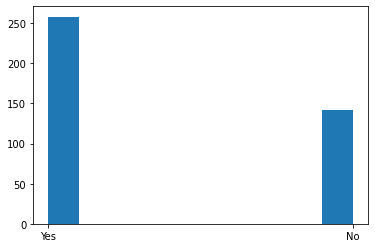

In [7]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(data['US']) 

<AxesSubplot:>

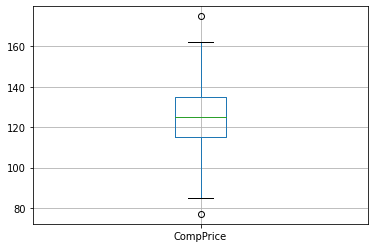

In [8]:
data.boxplot(column=['CompPrice'])

In [9]:
#data["CompPrice"] = np.where(data["CompPrice"] >160,124,data['CompPrice'])

In [10]:
#data["CompPrice"] = np.where(data["CompPrice"] <80,124,data['CompPrice'])

<AxesSubplot:>

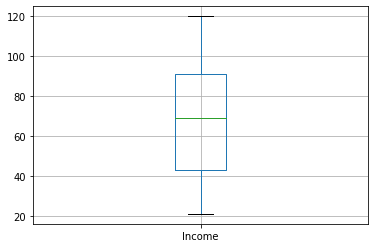

In [11]:
data.boxplot(column=['Income'])

<AxesSubplot:>

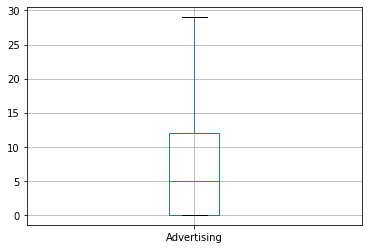

In [12]:
data.boxplot(column=['Advertising'])

<AxesSubplot:>

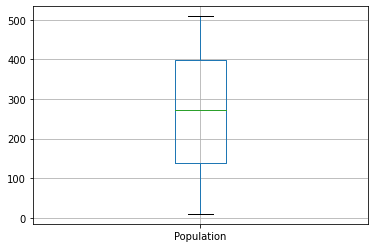

In [13]:
data.boxplot(column=['Population'])

<AxesSubplot:>

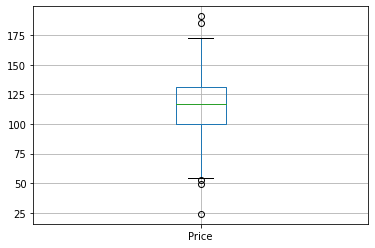

In [14]:
data.boxplot(column=['Price'])

In [15]:
#data["CompPrice"] = np.where(data["Price"] > 175,115,data["Price"])

In [16]:
#data["CompPrice"] = np.where(data["Price"] <50,115,data["Price"])

In [17]:
data_1=data

In [18]:
conditions = [
    (data_1['Sales'] < 5.4),
    (data_1['Sales'] < 7.4) & (data_1['Sales'] > 5.3),
    (data_1['Sales'] > 9.3),
]
values = ['High', 'Medium','Low']
data_1['Sales'] = np.select(conditions, values)

# display updated DataFrame
data_1.head(100)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Low,111,48,16,260,83,Good,65,10,Yes,Yes
2,Low,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,High,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
95,Medium,134,25,10,237,148,Medium,59,13,Yes,Yes
96,Low,147,42,10,407,132,Good,73,16,No,Yes
97,0,161,82,5,287,129,Bad,33,16,Yes,Yes
98,Low,122,77,24,382,127,Good,36,16,No,Yes


In [19]:
data_1['Sales'].unique()

array(['Low', '0', 'High', 'Medium'], dtype=object)

In [20]:
data_1['Sales'] = data_1['Sales'].replace(['0'],'Low')

In [21]:
column_names = ["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US","Sales"]

In [22]:
data_1 = data.reindex(columns=column_names)

In [23]:
data_1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,111,48,16,260,83,Good,65,10,Yes,Yes,Low
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Low
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,High


In [24]:
data_1 = pd.get_dummies(data_1,columns=['ShelveLoc','Urban','US'])
label_encoder = preprocessing.LabelEncoder()
data_1['Sales']= label_encoder.fit_transform(data_1['Sales'])  

In [25]:
data_1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,1,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [26]:
data_1.shape

(400, 15)

In [27]:
column_names = ["CompPrice","Income","Advertising","Population", "Price","Age","Education","ShelveLoc_Bad","ShelveLoc_Good","ShelveLoc_Medium","Urban_No","Urban_YES","US_No","US_Yes","Sales"]

In [28]:
data_1 = data_1.reindex(columns=column_names)

In [29]:
data_1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,NaN,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,NaN,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,NaN,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,NaN,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,NaN,1,0,0


In [30]:
x=data_1.iloc[:,:14]
y=data_1.iloc[:,14]

In [31]:
x1=x

In [32]:
x1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,NaN,0,1
1,111,48,16,260,83,65,10,0,1,0,0,NaN,0,1
2,113,35,10,269,80,59,12,0,0,1,0,NaN,0,1
3,117,100,4,466,97,55,14,0,0,1,0,NaN,0,1
4,141,64,3,340,128,38,13,1,0,0,0,NaN,1,0


In [33]:
data_1['Urban_YES'] = x1['Urban_YES'].fillna(0)

In [34]:
data_1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,0.0,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,0.0,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,0.0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,0.0,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,0.0,1,0,0


In [35]:
data_1 = data_1.astype(int) 

In [36]:
x=data_1.iloc[:,:14]
y=data_1.iloc[:,14]

In [37]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,0,0,1
1,111,48,16,260,83,65,10,0,1,0,0,0,0,1
2,113,35,10,269,80,59,12,0,0,1,0,0,0,1
3,117,100,4,466,97,55,14,0,0,1,0,0,0,1
4,141,64,3,340,128,38,13,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,0,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,0,0,1
398,100,79,7,284,95,50,12,1,0,0,0,0,0,1


In [38]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    2
397    1
398    2
399    1
Name: Sales, Length: 400, dtype: int32

In [39]:
data_1['Sales'].unique()

array([1, 0, 2])

In [40]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [41]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int32
 1   Income            400 non-null    int32
 2   Advertising       400 non-null    int32
 3   Population        400 non-null    int32
 4   Price             400 non-null    int32
 5   Age               400 non-null    int32
 6   Education         400 non-null    int32
 7   ShelveLoc_Bad     400 non-null    int32
 8   ShelveLoc_Good    400 non-null    int32
 9   ShelveLoc_Medium  400 non-null    int32
 10  Urban_No          400 non-null    int32
 11  Urban_YES         400 non-null    int32
 12  US_No             400 non-null    int32
 13  US_Yes            400 non-null    int32
 14  Sales             400 non-null    int32
dtypes: int32(15)
memory usage: 23.6 KB


# Building Decision Tree Classifier using Entropy Criteria

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

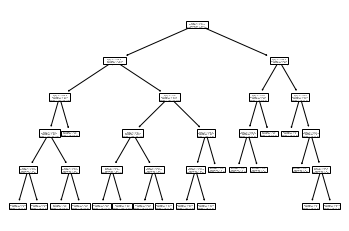

In [44]:
#PLot the decision tree
tree.plot_tree(model);

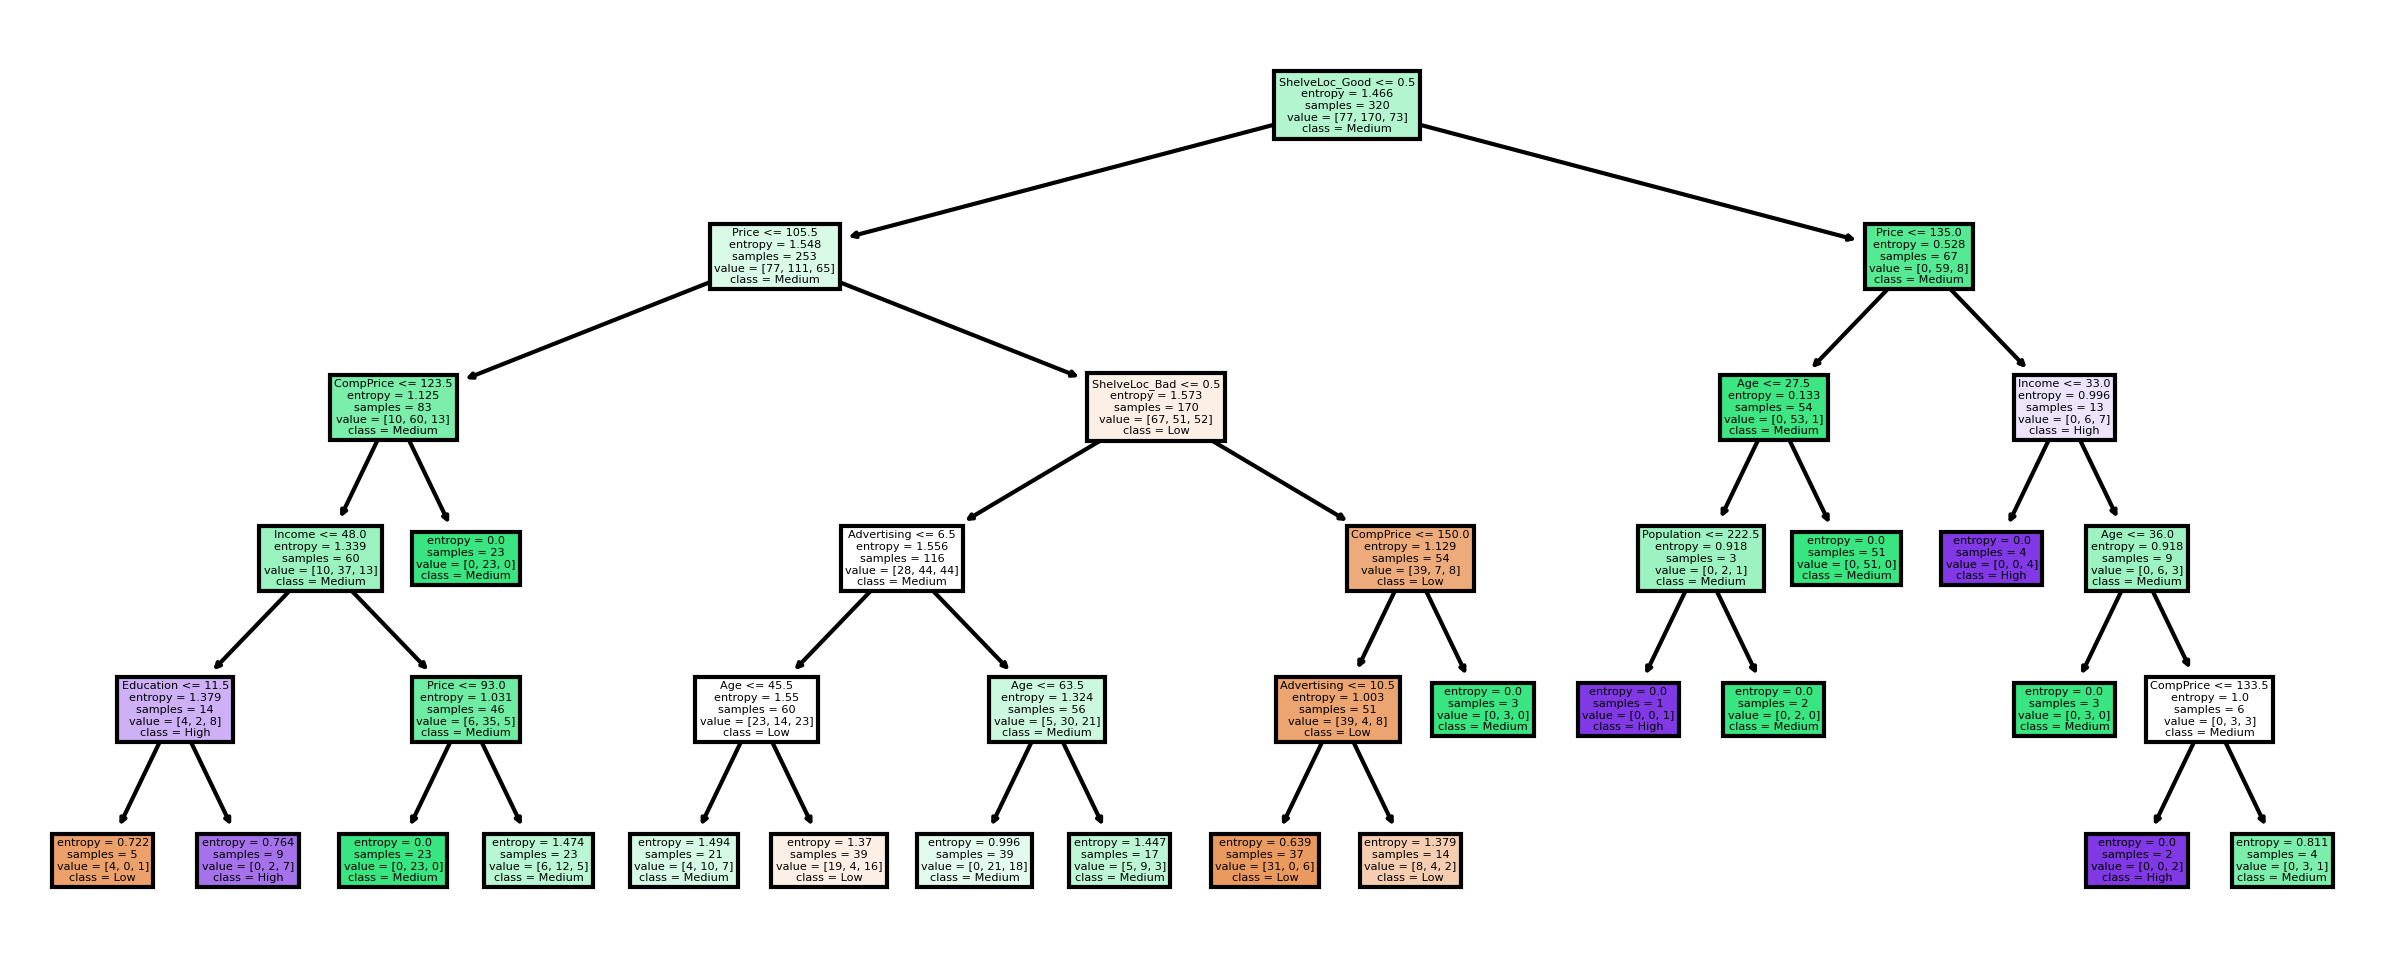

In [45]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names = cn,
               filled = True);

In [46]:
#Find the accuracy
model.score(x_test,y_test)*100

55.00000000000001

In [47]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 1000
max_features = 5
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.69375


In [48]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Price               0.218282
Age                 0.126765
CompPrice           0.120583
Income              0.104056
Population          0.090160
Advertising         0.086346
ShelveLoc_Bad       0.071401
Education           0.059013
ShelveLoc_Good      0.054655
ShelveLoc_Medium    0.030573
Urban_No            0.014417
US_No               0.012007
US_Yes              0.011741
Urban_YES           0.000000
dtype: float64

In [50]:
y_pred_100 = model.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.6375


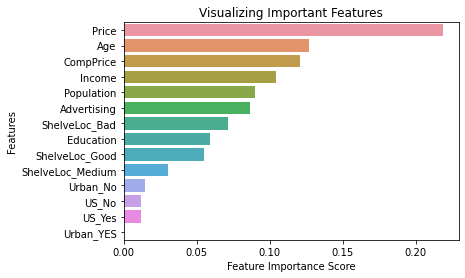

In [52]:
import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [53]:
data_1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_YES,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,0,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,0,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,0,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,0,0,1,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,2
397,162,26,12,368,159,40,18,0,0,1,0,0,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,0,0,1,2


In [54]:
# declare feature vector and target variable

X = data_1.drop(['Urban_No','Urban_YES','US_No','US_Yes'], axis=1)

In [55]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    2
397    1
398    2
399    1
Name: Sales, Length: 400, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [57]:
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score  variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  variable removed : 1.0000
